In [25]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Gaussian Blur Filter

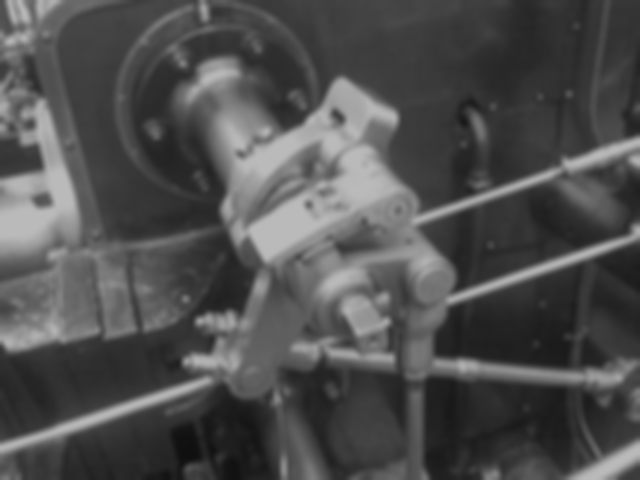

In [22]:
def gaussian_kernel(size, sigma=1):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g

def apply_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def gaussian_blur(image, kernel_size, sigma):
    # Create Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply kernel to image
    output = apply_kernel(image, kernel)
    return output

# Example usage
image = cv2.imread('original_image.PNG', cv2.IMREAD_GRAYSCALE)
blurred_image_scratch = gaussian_blur(image, 9, 3)

cv2_imshow(blurred_image_scratch)

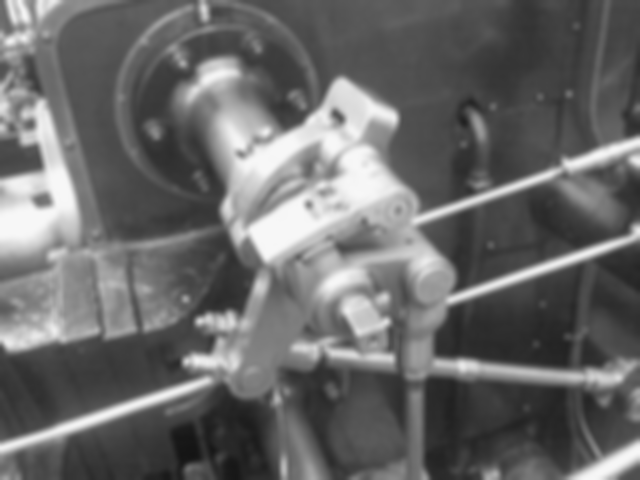

In [23]:
kernel_size = (9, 9)
sigma = 3

blurred_image_opencv = cv2.GaussianBlur(image, kernel_size, sigma)
cv2_imshow(blurred_image_opencv)

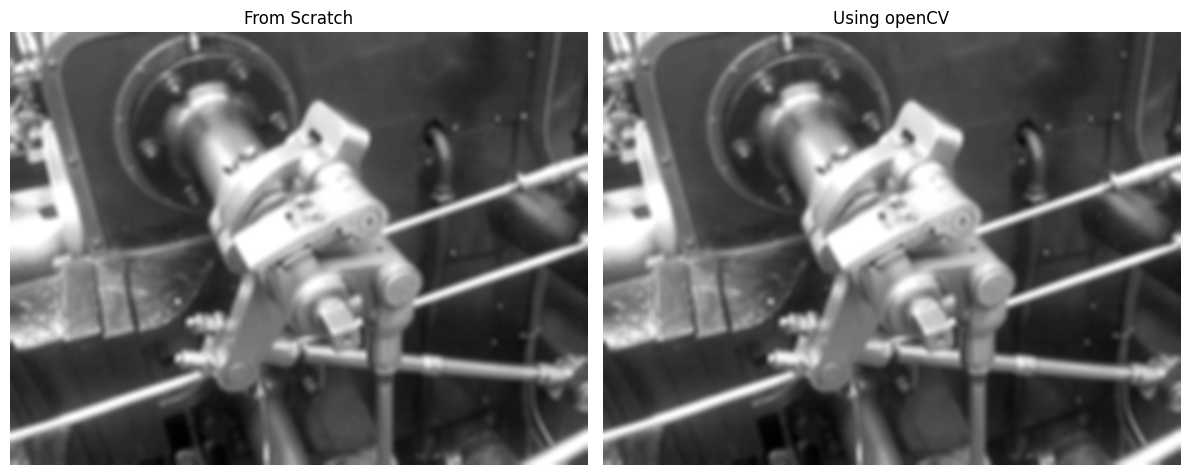

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(blurred_image_scratch, cmap='gray')
plt.title('From Scratch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_opencv, cmap='gray')
plt.title('Using openCV')
plt.axis('off')

plt.tight_layout()
plt.show()

#Median Filter


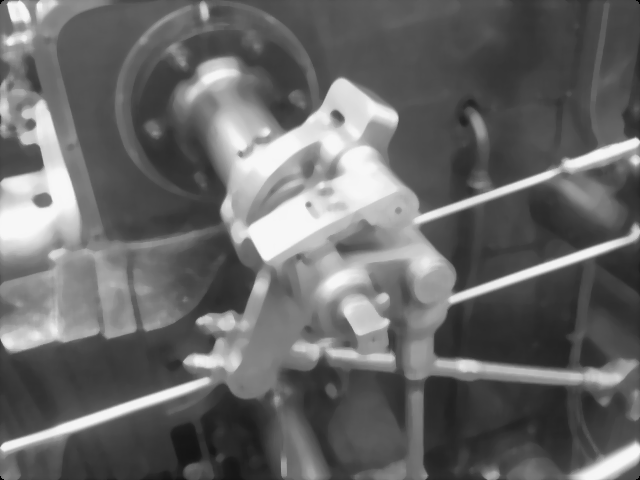

In [27]:
def median_filter(image, kernel_size):
    # Determine the padding size
    pad_size = kernel_size // 2

    # Pad the image with zeros on the border
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    # Initialize the output image
    output = np.zeros_like(image)

    # Traverse the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the neighborhood window
            window = padded_image[i:i + kernel_size, j:j + kernel_size]

            # Compute the median of the window
            output[i, j] = np.median(window)

    return output
kernel_size = 9

# Apply the median filter using OpenCV
median_image_scratch = median_filter(image, kernel_size)

# Display the result
cv2_imshow(median_image_scratch)

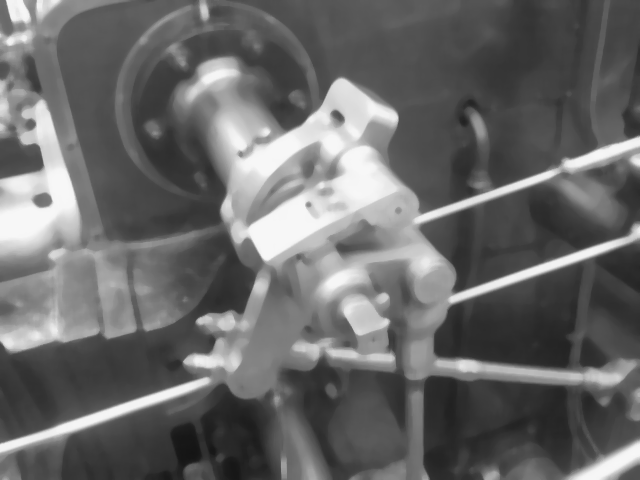

In [28]:
kernel_size = 9

# Apply the median filter using OpenCV
median_image_opencv = cv2.medianBlur(image, kernel_size)

# Display the result
cv2_imshow(median_image_opencv)

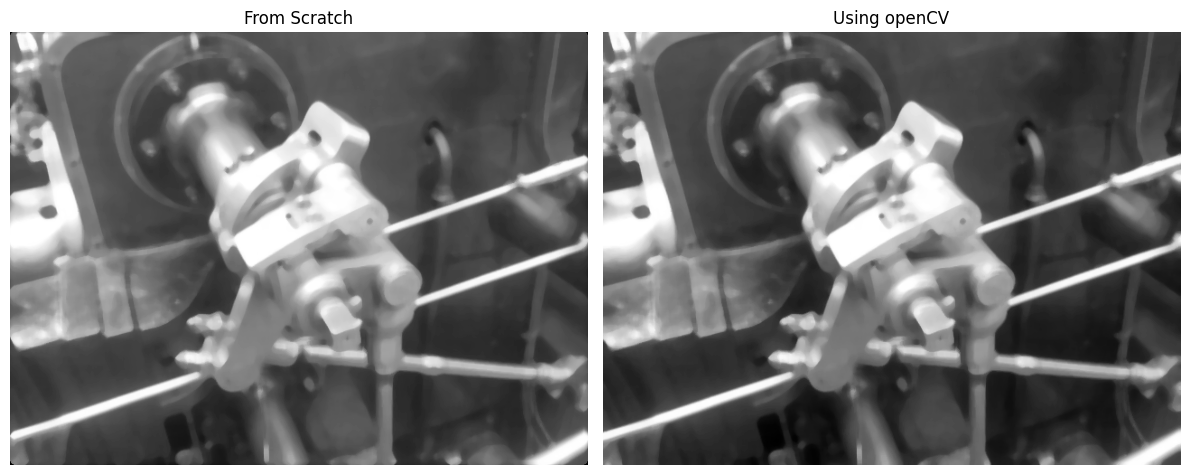

In [29]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(median_image_scratch, cmap='gray')
plt.title('From Scratch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_image_opencv, cmap='gray')
plt.title('Using openCV')
plt.axis('off')

plt.tight_layout()
plt.show()

#Laplacian Filter

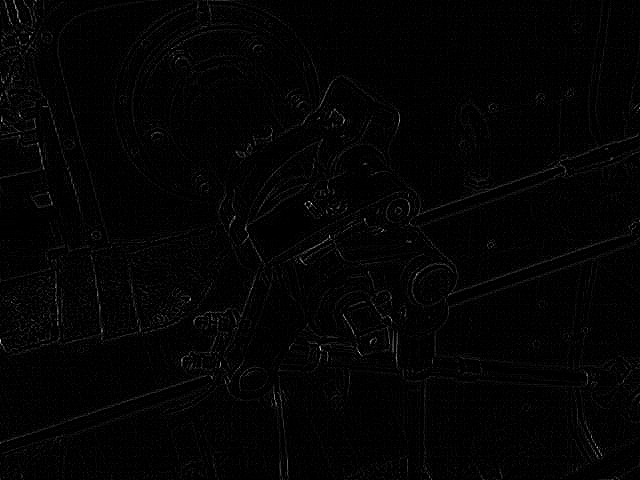

In [33]:
def laplacian_filter(image):
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    output = cv2.filter2D(image, -1, kernel)
    return output

# Apply the median filter using OpenCV
laplacian_image_scratch = laplacian_filter(image)

# Display the result
cv2_imshow(laplacian_image_scratch)

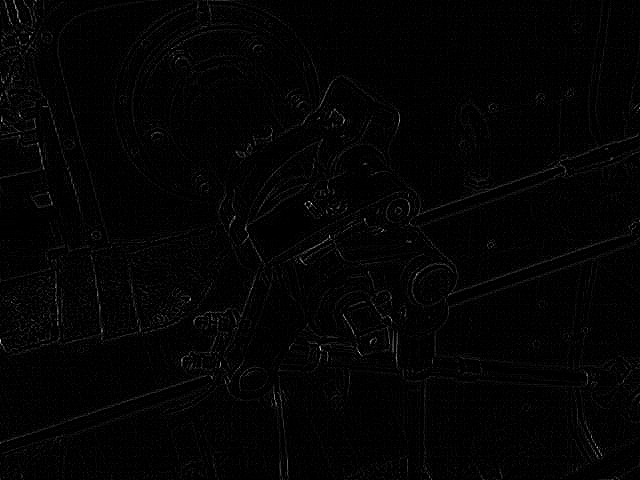

In [34]:
laplacian_image_opencv = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian_image = cv2.convertScaleAbs(laplacian_image_opencv)

# Display the result
cv2_imshow(laplacian_image_opencv)

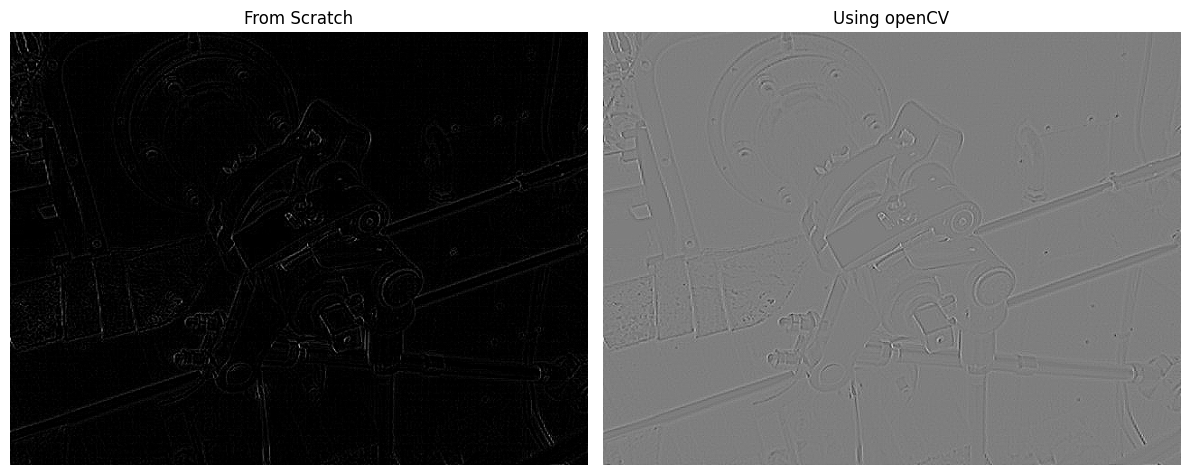

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(laplacian_image_scratch, cmap='gray')
plt.title('From Scratch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_image_opencv, cmap='gray')
plt.title('Using openCV')
plt.axis('off')

plt.tight_layout()
plt.show()

#Bilateral Filter

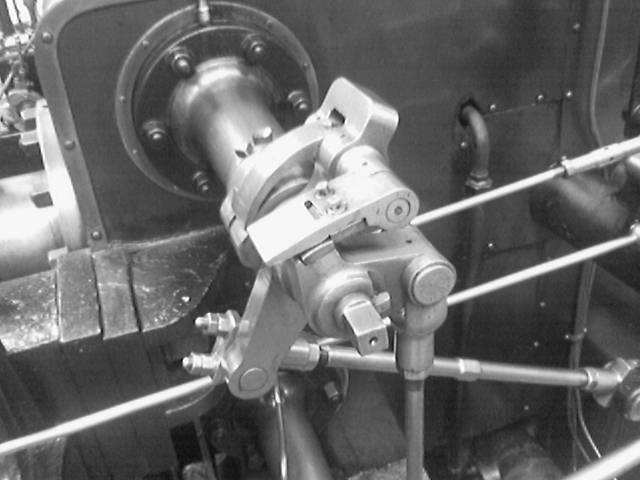

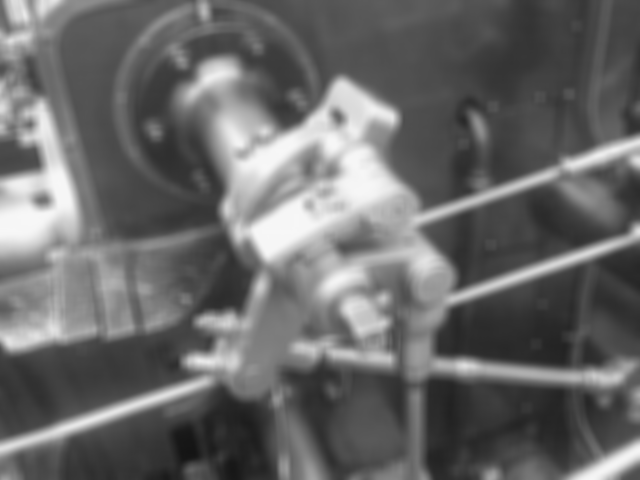

In [37]:
def bilateral_filter(image, d, sigma_color, sigma_space):
    # Convert to grayscale if image is colored
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Padding the image to handle borders
    padded_image = cv2.copyMakeBorder(image, d, d, d, d, cv2.BORDER_REPLICATE)

    # Prepare the output image
    filtered_image = np.zeros_like(image)

    # Precompute the Gaussian distance weights
    gauss_space = np.zeros((2*d+1, 2*d+1), dtype=np.float32)
    for i in range(-d, d+1):
        for j in range(-d, d+1):
            gauss_space[i+d, j+d] = np.exp(-(i**2 + j**2) / (2 * sigma_space**2))

    # Apply bilateral filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            i_padded = i + d
            j_padded = j + d

            # Extract the local region
            local_region = padded_image[i_padded-d:i_padded+d+1, j_padded-d:j_padded+d+1]

            # Compute the Gaussian range weights
            diff = local_region - image[i, j]
            gauss_range = np.exp(-(diff**2) / (2 * sigma_color**2))

            # Compute the bilateral filter response
            weights = gauss_space * gauss_range
            filtered_value = np.sum(weights * local_region) / np.sum(weights)

            filtered_image[i, j] = filtered_value

    return filtered_image

# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define filter parameters
d = 5
sigma_color = 75
sigma_space = 75

# Apply bilateral filter
bilateral_image_scratch = bilateral_filter(image, d, sigma_color, sigma_space)

# Display the result
cv2_imshow(image)
cv2_imshow(bilateral_image_scratch)


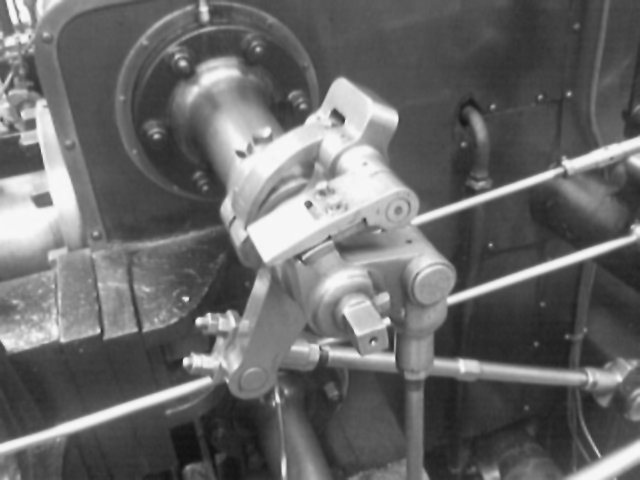

In [38]:
bilateral_image_opencv = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
cv2_imshow(bilateral_image_opencv)

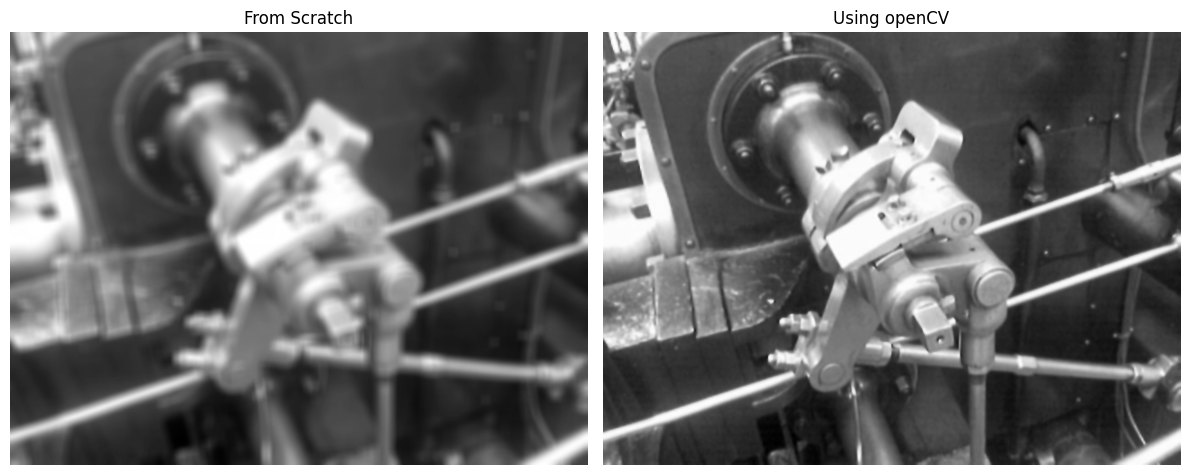

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(bilateral_image_scratch, cmap='gray')
plt.title('From Scratch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilateral_image_opencv, cmap='gray')
plt.title('Using openCV')
plt.axis('off')

plt.tight_layout()
plt.show()

#Gabor Filter

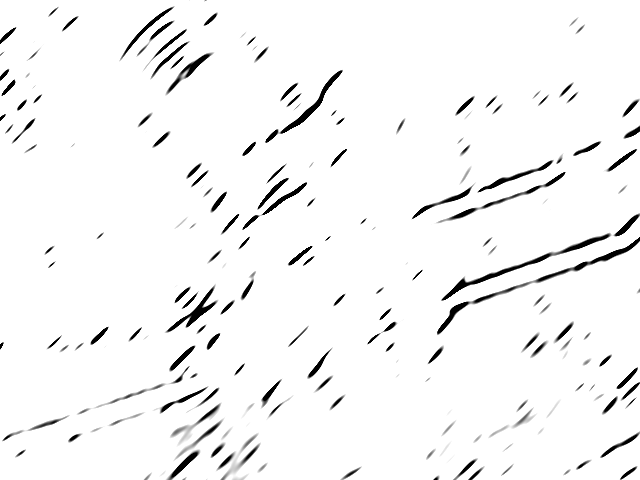

In [40]:
def gabor_kernel(ksize, sigma, theta, lambd, gamma, psi):
    """Generates a Gabor kernel."""
    half_size = ksize // 2
    y, x = np.meshgrid(np.linspace(-half_size, half_size, ksize), np.linspace(-half_size, half_size, ksize))
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)
    g = np.exp(-0.5 * (rotx**2 / sigma**2 + gamma**2 * roty**2 / sigma**2))
    g *= np.cos(2 * np.pi * rotx / lambd + psi)
    return g

def gabor_filter(image, ksize=31, sigma=4.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    """Applies Gabor filter to an image."""
    kernel = gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Apply Gabor filter
gabor_image_scratch = gabor_filter(image, ksize=31, sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)

# Display the result
cv2_imshow(gabor_image_scratch)


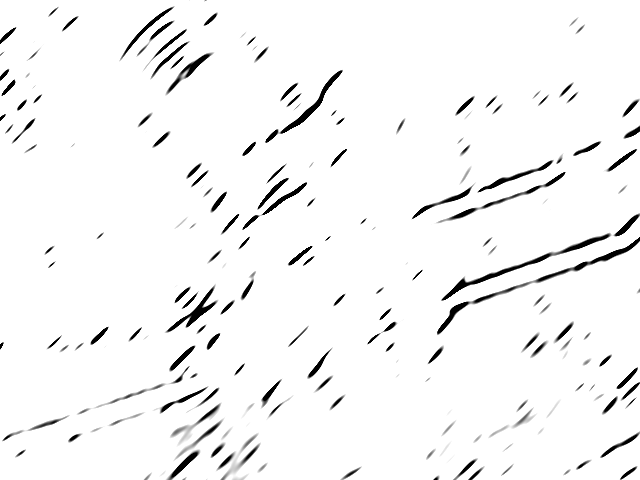

In [41]:
ksize = 31
sigma = 4.0
theta = np.pi / 4
lambd = 10.0
gamma = 0.5
psi = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Apply Gabor filter
gabor_image_opencv = cv2.filter2D(image, -1, kernel)

# Display the result
cv2_imshow(gabor_image_opencv)

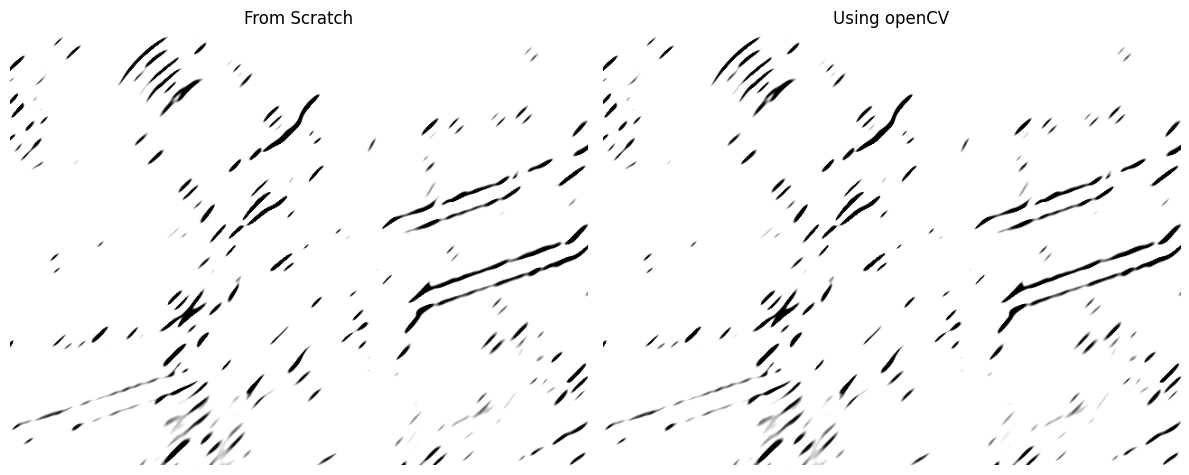

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gabor_image_scratch, cmap='gray')
plt.title('From Scratch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gabor_image_opencv, cmap='gray')
plt.title('Using openCV')
plt.axis('off')

plt.tight_layout()
plt.show()